# Proyecto final de Machine Learning

In [105]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
import warnings 
warnings.filterwarnings('ignore')

In [107]:
# make sure to install these packages before running:
# pip install pandas
# pip install sodapy
import pandas as pd
from sodapy import Socrata

In [108]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

In [109]:
# First 100000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("gt2j-8ykr", limit=100000)

In [110]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,fecha_muerte,nom_grupo_,pais_viajo_1_cod,pais_viajo_1_nom
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,Recuperado,2020-12-21 00:00:00,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,Recuperado,2020-12-07 00:00:00,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,Recuperado,2020-12-18 00:00:00,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,Fallecido,2020-12-17 00:00:00,2020-12-23 00:00:00,NaN,NaN,6,2020-12-30 00:00:00,NaN,NaN,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,Recuperado,2020-12-21 00:00:00,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN


In [111]:
# Obtain dimensions
results_df.shape

(100000, 23)

In [112]:
# Obtain information about data types and non-null values
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   fecha_reporte_web      100000 non-null  object
 1   id_de_caso             100000 non-null  object
 2   fecha_de_notificaci_n  100000 non-null  object
 3   departamento           100000 non-null  object
 4   departamento_nom       100000 non-null  object
 5   ciudad_municipio       100000 non-null  object
 6   ciudad_municipio_nom   100000 non-null  object
 7   edad                   100000 non-null  object
 8   unidad_medida          100000 non-null  object
 9   sexo                   100000 non-null  object
 10  fuente_tipo_contagio   100000 non-null  object
 11  ubicacion              100000 non-null  object
 12  estado                 100000 non-null  object
 13  recuperado             100000 non-null  object
 14  fecha_inicio_sintomas  92425 non-null   object
 15  f

In [113]:
results_df.isnull().sum().sort_values(ascending=False)

pais_viajo_1_nom         99933
pais_viajo_1_cod         99933
nom_grupo_               98247
fecha_muerte             96635
fecha_inicio_sintomas     7575
tipo_recuperacion         3258
fecha_recuperado          3258
fecha_diagnostico          127
ciudad_municipio_nom         0
departamento_nom             0
ciudad_municipio             0
fecha_de_notificaci_n        0
id_de_caso                   0
fecha_reporte_web            0
departamento                 0
recuperado                   0
estado                       0
ubicacion                    0
fuente_tipo_contagio         0
unidad_medida                0
sexo                         0
edad                         0
per_etn_                     0
dtype: int64

In [114]:
data_c = results_df.copy()

In [115]:
data_c['fecha_reporte_web'] = pd.to_datetime(data_c['fecha_reporte_web'].str.split(' ').str[0], format = '%Y-%m-%d')
data_c['fecha_de_notificaci_n'] = pd.to_datetime(data_c['fecha_de_notificaci_n'].str.split(' ').str[0], format = '%Y-%m-%d')
data_c['fecha_inicio_sintomas'] = pd.to_datetime(data_c['fecha_inicio_sintomas'].str.split(' ').str[0], format = '%Y-%m-%d')
data_c['fecha_diagnostico'] = pd.to_datetime(data_c['fecha_diagnostico'].str.split(' ').str[0], format = '%Y-%m-%d')
data_c['fecha_recuperado'] = pd.to_datetime(data_c['fecha_recuperado'].str.split(' ').str[0], format = '%Y-%m-%d')
data_c['fecha_muerte'] = pd.to_datetime(data_c['fecha_muerte'].str.split(' ').str[0], format = '%Y-%m-%d')

In [116]:
data_c['id_de_caso'] = pd.to_numeric(data_c['id_de_caso'], errors='coerce')
data_c['edad'] = pd.to_numeric(data_c['edad'], errors='coerce')
data_c['unidad_medida'] = pd.to_numeric(data_c['unidad_medida'], errors='coerce')

In [117]:
data_c.loc[data_c['unidad_medida'] == 2, 'edad'] = data_c['edad'] / 12
data_c.loc[data_c['unidad_medida'] == 3, 'edad'] = data_c['edad'] / 365
data_c['edad'] = data_c['edad'].round()

In [118]:
edad = data_c["edad"].value_counts()

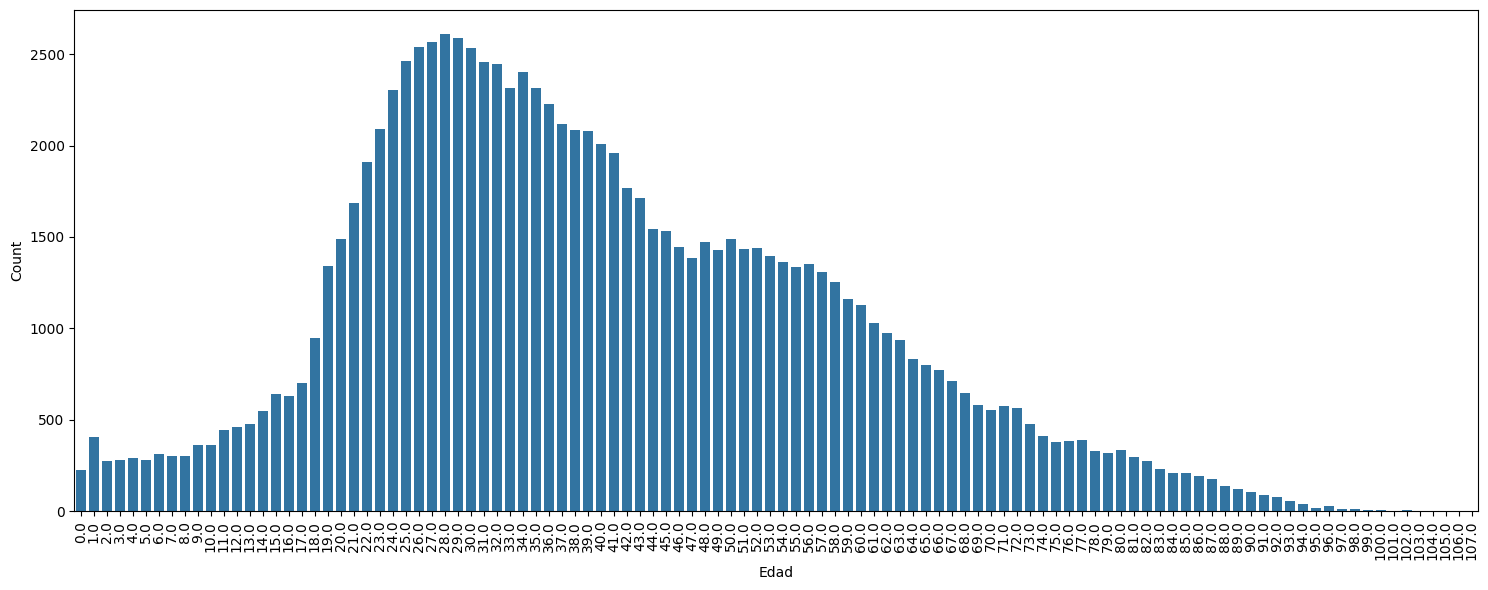

In [119]:
plt.figure(figsize=(15,6))
sns.barplot(x=edad.index, y=edad.values).set(xlabel ="Edad", ylabel = "Count", title =None)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [120]:
data_c = data_c.drop(columns=['departamento', 'ciudad_municipio', 'unidad_medida', 'per_etn_', 'nom_grupo_'])

In [121]:
data_c.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento_nom,ciudad_municipio_nom,edad,sexo,fuente_tipo_contagio,ubicacion,estado,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,fecha_muerte,pais_viajo_1_cod,pais_viajo_1_nom
0,2020-12-24,1556979,2020-12-22,VALLE,CALI,67.0,F,Comunitaria,Casa,Leve,Recuperado,2020-12-21,2020-12-23,2021-01-04,Tiempo,NaT,NaN,NaN
1,2020-12-24,1556980,2020-12-19,VALLE,CALI,66.0,F,Comunitaria,Casa,Leve,Recuperado,2020-12-07,2020-12-23,2020-12-25,Tiempo,NaT,NaN,NaN
2,2020-12-24,1556981,2020-12-19,VALLE,CALI,68.0,F,Comunitaria,Casa,Leve,Recuperado,2020-12-18,2020-12-22,2021-01-01,Tiempo,NaT,NaN,NaN
3,2020-12-24,1556982,2020-12-22,VALLE,CALI,74.0,F,Comunitaria,Fallecido,Fallecido,Fallecido,2020-12-17,2020-12-23,NaT,NaN,2020-12-30,NaN,NaN
4,2020-12-24,1556983,2020-12-22,VALLE,CALI,65.0,F,Comunitaria,Casa,Leve,Recuperado,2020-12-21,2020-12-23,2021-01-04,Tiempo,NaT,NaN,NaN


In [122]:
data_c["id_de_caso"].nunique()

100000

In [123]:
departamento_nom = data_c["departamento_nom"].value_counts()
print(f"{departamento_nom}")

departamento_nom
BOGOTA             27587
ANTIOQUIA          14830
VALLE               8061
CUNDINAMARCA        4407
SANTANDER           4018
BARRANQUILLA        3241
TOLIMA              3057
CARTAGENA           3015
NORTE SANTANDER     2723
CALDAS              2471
HUILA               2415
META                2395
NARIÑO              2359
RISARALDA           2163
ATLANTICO           2160
CESAR               1967
BOYACA              1806
CORDOBA             1630
CAUCA               1398
QUINDIO             1358
SUCRE               1143
STA MARTA D.E.      1111
CAQUETA              941
GUAJIRA              744
CASANARE             510
MAGDALENA            464
BOLIVAR              438
PUTUMAYO             419
AMAZONAS             259
ARAUCA               256
CHOCO                236
SAN ANDRES           194
GUAVIARE              78
GUAINIA               63
VAUPES                60
VICHADA               23
Name: count, dtype: int64


In [124]:
len(departamento_nom)

36

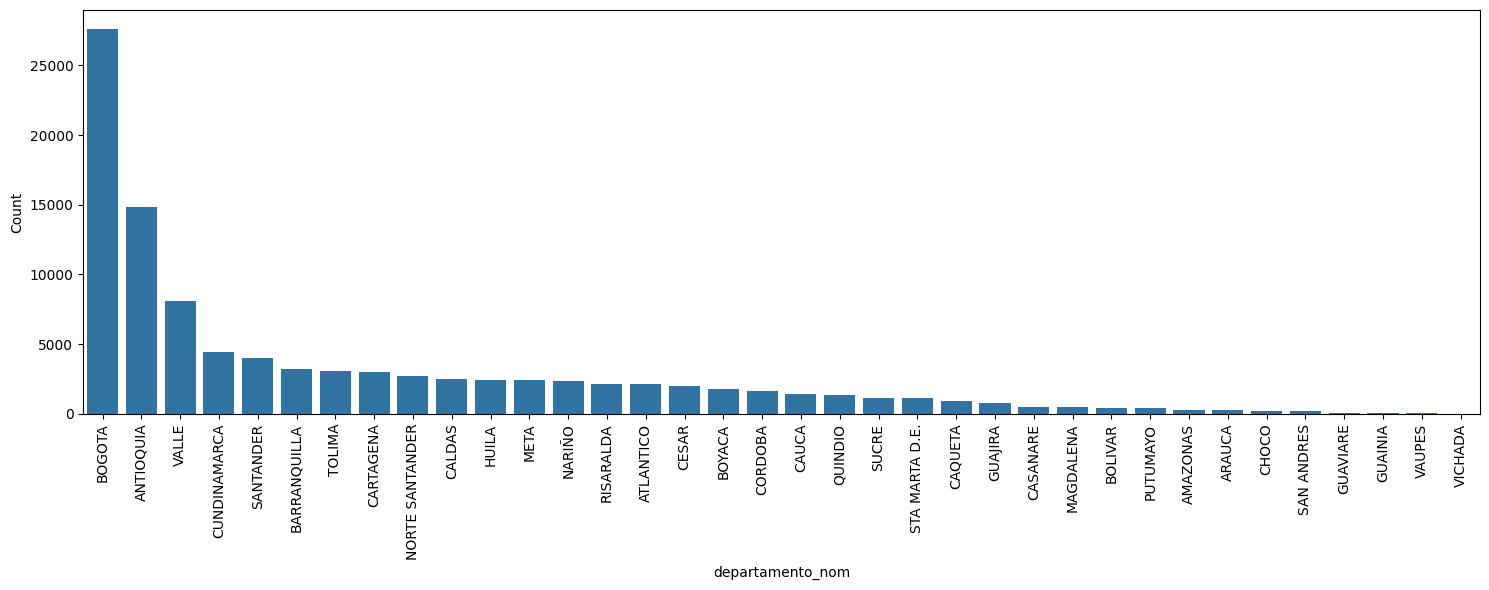

In [125]:
plt.figure(figsize=(15,6))
sns.barplot(x=departamento_nom.index, y=departamento_nom.values).set(xlabel ="departamento_nom", ylabel = "Count", title =None)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [126]:
data_c['departamento_nom'] = data_c['departamento_nom'].replace('BARRANQUILLA', 'ATLANTICO')
data_c['departamento_nom'] = data_c['departamento_nom'].replace('CARTAGENA', 'BOLIVAR')
data_c['departamento_nom'] = data_c['departamento_nom'].replace('STA MARTA D.E.', 'MAGDALENA')

In [127]:
sexo=data_c["sexo"].value_counts()
print(f"{sexo}")

sexo
F    50372
M    49628
Name: count, dtype: int64


In [128]:
data_c = pd.get_dummies(data_c, columns = ['sexo'])
data_c.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento_nom,ciudad_municipio_nom,edad,fuente_tipo_contagio,ubicacion,estado,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,fecha_muerte,pais_viajo_1_cod,pais_viajo_1_nom,sexo_F,sexo_M
0,2020-12-24,1556979,2020-12-22,VALLE,CALI,67.0,Comunitaria,Casa,Leve,Recuperado,2020-12-21,2020-12-23,2021-01-04,Tiempo,NaT,NaN,NaN,True,False
1,2020-12-24,1556980,2020-12-19,VALLE,CALI,66.0,Comunitaria,Casa,Leve,Recuperado,2020-12-07,2020-12-23,2020-12-25,Tiempo,NaT,NaN,NaN,True,False
2,2020-12-24,1556981,2020-12-19,VALLE,CALI,68.0,Comunitaria,Casa,Leve,Recuperado,2020-12-18,2020-12-22,2021-01-01,Tiempo,NaT,NaN,NaN,True,False
3,2020-12-24,1556982,2020-12-22,VALLE,CALI,74.0,Comunitaria,Fallecido,Fallecido,Fallecido,2020-12-17,2020-12-23,NaT,NaN,2020-12-30,NaN,NaN,True,False
4,2020-12-24,1556983,2020-12-22,VALLE,CALI,65.0,Comunitaria,Casa,Leve,Recuperado,2020-12-21,2020-12-23,2021-01-04,Tiempo,NaT,NaN,NaN,True,False


In [129]:
data_c['sexo_F'] = data_c['sexo_F'].astype(int)
data_c['sexo_M'] = data_c['sexo_M'].astype(int)
data_c.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento_nom,ciudad_municipio_nom,edad,fuente_tipo_contagio,ubicacion,estado,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,fecha_muerte,pais_viajo_1_cod,pais_viajo_1_nom,sexo_F,sexo_M
0,2020-12-24,1556979,2020-12-22,VALLE,CALI,67.0,Comunitaria,Casa,Leve,Recuperado,2020-12-21,2020-12-23,2021-01-04,Tiempo,NaT,NaN,NaN,1,0
1,2020-12-24,1556980,2020-12-19,VALLE,CALI,66.0,Comunitaria,Casa,Leve,Recuperado,2020-12-07,2020-12-23,2020-12-25,Tiempo,NaT,NaN,NaN,1,0
2,2020-12-24,1556981,2020-12-19,VALLE,CALI,68.0,Comunitaria,Casa,Leve,Recuperado,2020-12-18,2020-12-22,2021-01-01,Tiempo,NaT,NaN,NaN,1,0
3,2020-12-24,1556982,2020-12-22,VALLE,CALI,74.0,Comunitaria,Fallecido,Fallecido,Fallecido,2020-12-17,2020-12-23,NaT,NaN,2020-12-30,NaN,NaN,1,0
4,2020-12-24,1556983,2020-12-22,VALLE,CALI,65.0,Comunitaria,Casa,Leve,Recuperado,2020-12-21,2020-12-23,2021-01-04,Tiempo,NaT,NaN,NaN,1,0


In [130]:
data_c.columns

Index(['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificaci_n',
       'departamento_nom', 'ciudad_municipio_nom', 'edad',
       'fuente_tipo_contagio', 'ubicacion', 'estado', 'recuperado',
       'fecha_inicio_sintomas', 'fecha_diagnostico', 'fecha_recuperado',
       'tipo_recuperacion', 'fecha_muerte', 'pais_viajo_1_cod',
       'pais_viajo_1_nom', 'sexo_F', 'sexo_M'],
      dtype='object')

In [131]:
fuente_tipo_contagio = data_c["fuente_tipo_contagio"].value_counts()
print(f"{fuente_tipo_contagio}")

fuente_tipo_contagio
Comunitaria    76360
Relacionado    23573
Importado         67
Name: count, dtype: int64


In [132]:
# * Corresponde a muertes no relacionadas con COVID-19, aún si eran casos activos **Hay pacientes recuperados para COVID-19, que pueden permanecer en hospitalización por otras comorbilidades
ubicacion = data_c["ubicacion"].value_counts()
print(f"{ubicacion}")

ubicacion
Casa         96630
Fallecido     2809
N/A            556
casa             5
Name: count, dtype: int64


In [133]:
data_c['ubicacion'] = data_c['ubicacion'].replace('casa', 'Casa')
ubicacion = data_c["ubicacion"].value_counts()
print(f"{ubicacion}")

ubicacion
Casa         96635
Fallecido     2809
N/A            556
Name: count, dtype: int64


In [134]:
# * Corresponde a muertes no relacionadas con COVID-19, aún si eran casos activos **Hay pacientes recuperados para COVID-19, que pueden permanecer en hospitalización por otras comorbilidades
estado = data_c["estado"].value_counts()
print(f"{estado}")

estado
Leve         96630
Fallecido     2809
N/A            556
leve             5
Name: count, dtype: int64


In [135]:
data_c['estado'] = data_c['estado'].replace('leve', 'Leve')
estado = data_c["estado"].value_counts()
print(f"{estado}")

estado
Leve         96635
Fallecido     2809
N/A            556
Name: count, dtype: int64


In [136]:
# Recuperado Fallecido N/A (Vacío). N/A se refiere a los fallecidos no COVID. 
# Pueden haber casos recuperados con ubicación Hospital u Hospital UCI, ya que permanecen en hospitalización por causas diferentes. 
# Los casos con información en blanco en esta columna corresponde a los casos activos
recuperado = data_c["recuperado"].value_counts()
print(f"{recuperado}")

recuperado
Recuperado    96742
Fallecido      2799
N/A             449
fallecido        10
Name: count, dtype: int64


In [137]:
data_c['recuperado'] = data_c['recuperado'].replace('fallecido', 'Fallecido')
recuperado = data_c["recuperado"].value_counts()
print(f"{recuperado}")

recuperado
Recuperado    96742
Fallecido      2809
N/A             449
Name: count, dtype: int64


In [139]:
# Se refiere a la variable de tipo de recuperación que tiene dos opciones: PCR y tiempo. 
# PCR indica que la persona se encuentra recuperada por segunda muestra, en donde dio negativo para el virus; 
# Tiempo significa que son personas que cumplieron 30 días posteriores al inicio de síntomas o toma de muestras que no tienen síntomas, 
# que no tengan más de 70 años ni que estén hospitalizados.
data_c['tipo_recuperacion'] = data_c['tipo_recuperacion'].replace('NaN', np.nan)
tipo_recuperacion = data_c["tipo_recuperacion"].value_counts()
print(f"{tipo_recuperacion}")

tipo_recuperacion
Tiempo    75705
PCR       21037
Name: count, dtype: int64


In [ ]:
pais_viajo_1_nom = data_c["pais_viajo_1_nom"].value_counts()
print(f"{pais_viajo_1_nom}")

pais_viajo_1_nom
ESTADOS UNIDOS DE AMÉRICA    27
MÉXICO                       11
BRASIL                        6
REPÚBLICA DOMINICANA          5
ECUADOR                       4
PERÚ                          2
ESPAÑA                        2
EL SALVADOR                   2
PORTUGAL                      1
FRANCIA                       1
ALEMANIA                      1
PANAMÁ                        1
ARMENIA                       1
EMIRATOS ARABES UNIDOS        1
NORUEGA                       1
DOMINICA                      1
Name: count, dtype: int64


In [141]:
pais_viajo_1_cod = data_c["pais_viajo_1_cod"].value_counts()
print(f"{pais_viajo_1_cod}")

pais_viajo_1_cod
840    27
484    11
76      6
214     5
218     4
604     2
724     2
222     2
620     1
250     1
276     1
591     1
51      1
784     1
578     1
212     1
Name: count, dtype: int64
